In [1]:
import librosa
from tqdm import tqdm
import os
import json
from scipy.io import wavfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### OTHER


- На основе: https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/notebooks
- На основе: https://www.kaggle.com/chimichangasguy/speechrecognition

Speech representation and data exploration
https://www.kaggle.com/davids1992/speech-representation-and-data-exploration
End-to-end baseline TF Estimator LB 0.72
Audio Data Conversion to Images + EDA
Light-Weight CNN LB 0.74

In [ ]:
#ввод_вывод_voice_запись_аудио
#ввод_вывод_voice_чтение_аудиофайлов
#ввод_вывод_voice_сохранение_аудио
#ввод_вывод_voice_преобразование_форматов_аудио
#ввод_вывод_voice_анализ_аудио
#ввод_вывод_voice_распознавание

# ввод_вывод_voice_распознавание

In [ ]:
# ВАРИАНТ №20
# Использование tensorflow для построения обучения модели для распознавания слов

In [1]:
# Шаг 1. Импорт библиотек
# pip install keras
# pip install tensorflow --user
# pip install pyyaml
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
# We use 1 dimensional arrays due to audio files, we use Conv1D and MaxPooling1D
# Dense is used for connecting the entire neural network
# Flattening is the process of converting all the resultant 1D arrays into a single long continuous linear vector
# A dropout layer is used for regularization where you randomly set some of the dimensions of your input vector to be zero
from keras.models import Model #Used to instantiate a Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from matplotlib import pyplot 
import random
import soundfile as sf
from os.path import join

Using TensorFlow backend.


In [10]:
# Шаг 5. Подготовка данных
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples) == 8000): 
            all_wave.append(samples)
            all_label.append(label)
le = LabelEncoder()
y = le.fit_transform(all_label)
classes = list(le.classes_)

five
no
yes


In [62]:
# Шаг 6. Подготовка модели
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

y = np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1, 8000, 1)
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave), np.array(y), stratify=y,test_size = 0.2,
                                            random_state=777, shuffle=True)
K.clear_session()
inputs = Input(shape=(8000, 1))
#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)
#Flatten layer
conv = Flatten()(conv)
#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)
#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0   

In [63]:
# Шаг 7. Тренировка модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=model.fit(x_tr, y_tr ,epochs=10, callbacks=[es,mc], batch_size=32, validation_data=(x_val, y_val))

Train on 1130 samples, validate on 283 samples
Epoch 1/100
1130/1130 [==============================] - 5s 4ms/step - loss: 1.0973 - accuracy: 0.3867 - val_loss: 1.0690 - val_accuracy: 0.4276
Epoch 2/100
1130/1130 [==============================] - 4s 4ms/step - loss: 1.0231 - accuracy: 0.4779 - val_loss: 1.0091 - val_accuracy: 0.4841
Epoch 3/100
1130/1130 [==============================] - 4s 4ms/step - loss: 0.8860 - accuracy: 0.5823 - val_loss: 0.9591 - val_accuracy: 0.5406
Epoch 4/100
1130/1130 [==============================] - 4s 4ms/step - loss: 0.8372 - accuracy: 0.6159 - val_loss: 0.9958 - val_accuracy: 0.5336
Epoch 5/100
1130/1130 [==============================] - 4s 4ms/step - loss: 0.8089 - accuracy: 0.6257 - val_loss: 0.8565 - val_accuracy: 0.6290
Epoch 6/100
1130/1130 [==============================] - 4s 4ms/step - loss: 0.7507 - accuracy: 0.6673 - val_loss: 0.8171 - val_accuracy: 0.6360
Epoch 7/100
1130/1130 [==============================] - 4s 4ms/step - loss: 0.6935

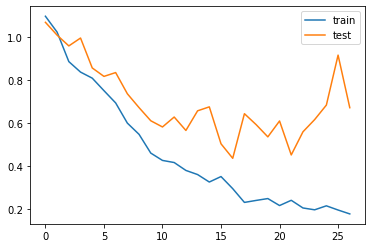

In [64]:
# Шаг 8. Визуализация процесса тренировки
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [74]:
# Шаг 9. Предсказание
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]
# Случайный сэмпл
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:", predict(samples))
# или
filepath = r'c:\Users\balob\Downloads\voice\train\yes'
samples, sample_rate = librosa.load(filepath + '\\' + 'c2d15ea5_nohash_2.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
print(f'Record predict: {predict(samples)}')
ipd.Audio(samples,rate=8000) 
# Предсказание с микрофона
import soundcard as sc
samplerate = 8000 # (int) – The desired sampling rate in Hz
sec = 1
numframes = int(samplerate * sec) # (int) – The number of frames to record. Такой же как samplerate, чтобы записать секунду.
default_mic = sc.default_microphone()
print(f'Microphone in use: {default_mic}')
samples = default_mic.record(samplerate = samplerate, numframes = numframes, channels = 1).ravel()
print(f'Recorded shape: {samples.shape}')
print(f'Record predict: {predict(samples)}')
ipd.Audio(samples, rate=samplerate)

Audio: five
Text: five
Record predict: yes
Microphone in use: <Microphone Микрофон (Realtek Audio) (2 channels)>
Recorded shape: (8000,)
Record predict: five


In [ ]:
# Шаг 10. Сохранение модели
import pickle
downloads = 'C:/Users/balob/Downloads'
file_Name = "model_voice_test.picle"
# open the file for writing
fileObject = open(join(downloads,file_Name),'wb') 
pickle.dump(model, fileObject)
fileObject.close()

In [ ]:
# Шаг 11. Импорт модели и предсказание с голоса или из файла
import pickle
downloads = 'C:/Users/balob/Downloads'
file_Name = "model_voice_test.picle"
fileObject = open(join(downloads,file_Name),'rb')  
model = pickle.load(fileObject)
classes = ['five', 'no', 'yes']
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]
# С голоса
import soundcard as sc
import IPython.display as ipd
samplerate = 8000 # (int) – The desired sampling rate in Hz
sec = 1
numframes = int(samplerate * sec) # (int) – The number of frames to record. Такой же как samplerate, чтобы записать секунду.
default_mic = sc.default_microphone()
print(f'Microphone in use: {default_mic}')
samples = default_mic.record(samplerate = samplerate, numframes = numframes, channels = 1).ravel()
print(f'Recorded shape: {samples.shape}')
print(f'Record predict: {predict(samples)}')
ipd.Audio(samples, rate=samplerate)
# Из файла
import librosa
filepath = r'c:\Users\balob\Downloads\voice_testing\no'
samples, sample_rate = librosa.load(filepath + '\\' + '012c8314_nohash_0.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
print(f'Record predict: {predict(samples)}')
ipd.Audio(samples,rate=8000) 
# На основе: https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/notebooks
# На основе: https://www.kaggle.com/chimichangasguy/speechrecognition

### Использовать обученную модель

In [2]:
import pickle
import numpy as np
from os.path import join
downloads = 'C:/Users/balob/Downloads'
file_Name = "model_voice_test.picle"
fileObject = open(join(downloads,file_Name),'rb')  
model = pickle.load(fileObject)

Using TensorFlow backend.


In [3]:
classes = ['five', 'no', 'yes']
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [16]:
import soundcard as sc
import IPython.display as ipd
samplerate = 8000 # (int) – The desired sampling rate in Hz
sec = 1
numframes = int(samplerate * sec) # (int) – The number of frames to record. Такой же как samplerate, чтобы записать секунду.
default_mic = sc.default_microphone()
print(f'Microphone in use: {default_mic}')
samples = default_mic.record(samplerate = samplerate, numframes = numframes, channels = 1).ravel()
print(f'Recorded shape: {samples.shape}')
print(f'Record predict: {predict(samples)}')
ipd.Audio(samples, rate=samplerate)

Microphone in use: <Microphone Микрофон (Realtek Audio) (2 channels)>
Recorded shape: (8000,)
Record predict: five


### Developments

In [ ]:
# Использование tensorflow для построения обучения модели для распознавания слов

In [17]:
import librosa
import tensorflow as tf
import numpy as np

SAVED_MODEL_PATH = r"c:\Users\balob\Downloads\VOICE\model.h5"
SAMPLES_TO_CONSIDER = 22050

class _Keyword_Spotting_Service:
    """Singleton class for keyword spotting inference with trained models.
    :param model: Trained model
    """

    model = None
    _mapping = ["yes", "no", "five"]
    _instance = None


    def predict(self, file_path):
        """
        :param file_path (str): Path to audio file to predict
        :return predicted_keyword (str): Keyword predicted by the model
        """

        # extract MFCC
        MFCCs = self.preprocess(file_path)

        # we need a 4-dim array to feed to the model for prediction: (# samples, # time steps, # coefficients, 1)
        MFCCs = MFCCs[np.newaxis, ..., np.newaxis]

        # get the predicted label
        predictions = self.model.predict(MFCCs)
        predicted_index = np.argmax(predictions)
        predicted_keyword = self._mapping[predicted_index]
        return predicted_keyword


    def preprocess(self, file_path, num_mfcc=13, n_fft=2048, hop_length=512):
        """Extract MFCCs from audio file.
        :param file_path (str): Path of audio file
        :param num_mfcc (int): # of coefficients to extract
        :param n_fft (int): Interval we consider to apply STFT. Measured in # of samples
        :param hop_length (int): Sliding window for STFT. Measured in # of samples
        :return MFCCs (ndarray): 2-dim array with MFCC data of shape (# time steps, # coefficients)
        """

        # load audio file
        signal, sample_rate = librosa.load(file_path)

        if len(signal) >= SAMPLES_TO_CONSIDER:
            # ensure consistency of the length of the signal
            signal = signal[:SAMPLES_TO_CONSIDER]

            # extract MFCCs
            MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                         hop_length=hop_length)
        return MFCCs.T


def Keyword_Spotting_Service():
    """Factory function for Keyword_Spotting_Service class.
    :return _Keyword_Spotting_Service._instance (_Keyword_Spotting_Service):
    """

    # ensure an instance is created only the first time the factory function is called
    if _Keyword_Spotting_Service._instance is None:
        _Keyword_Spotting_Service._instance = _Keyword_Spotting_Service()
        _Keyword_Spotting_Service.model = tf.keras.models.load_model(SAVED_MODEL_PATH)
    return _Keyword_Spotting_Service._instance




# create 2 instances of the keyword spotting service
kss = Keyword_Spotting_Service()
kss1 = Keyword_Spotting_Service()

# check that different instances of the keyword spotting service point back to the same object (singleton)
assert kss is kss1

# make a prediction
keyword = kss.predict(r"c:\Users\balob\Downloads\VOICE\test\five\0132a06d_nohash_0.wav")
print(keyword)

no


In [20]:
keyword = kss.predict(r"c:\Users\balob\Downloads\VOICE\test\five\063d48cf_nohash_1.wav")
print(keyword)

yes
